### Student Information
Name:廖哲暉

Student ID:111062534

GitHub ID: HuiXillya

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

## part 1

Exercise 5

In [2]:
import numpy as np
import pandas as pd
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df
NA_df['missing_example'].isnull()

# Answer here
# row 2,3 have str values for NaN and None
# row 5 has empty string

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Exercise 6

In [3]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
import sys 
sys.path.append("..") 
import helpers.data_mining_helpers as dmh
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X_sample = X.sample(n=1000,random_state=42) #random state
# Answer here
print(len(X_sample),len(X))
X_sample = X_sample.drop(list(X_sample.index))
print(len(X_sample),len(X))
X_sample = X.sample(n=1000,random_state=42) #random state
# X_sample has 1000 samples for X, two dataframe is indepandent and the index of x sample will be discontinuous. Same index in two dataframe has same values.

1000 2257
0 2257


Exercise 8

Exercise 10


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

analyze = count_vect.build_analyzer()

# Answer here
assert '00' in analyze(X.iloc[4].text)
count_vect.get_feature_names_out()[[idx for idx, x in enumerate(X_counts[0:5, 0:100].toarray()[4]) if x != 0]]
# another 1 represents str '01'

array(['00', '01'], dtype=object)

Exercise 11

,term_organization,term_the,term_lines,term_from,term_subject
doc_1403,1,589,1,47,2
doc_433,2,362,2,72,4
doc_768,2,200,7,39,1
doc_1890,1,242,4,58,11
doc_400,1,249,3,63,2


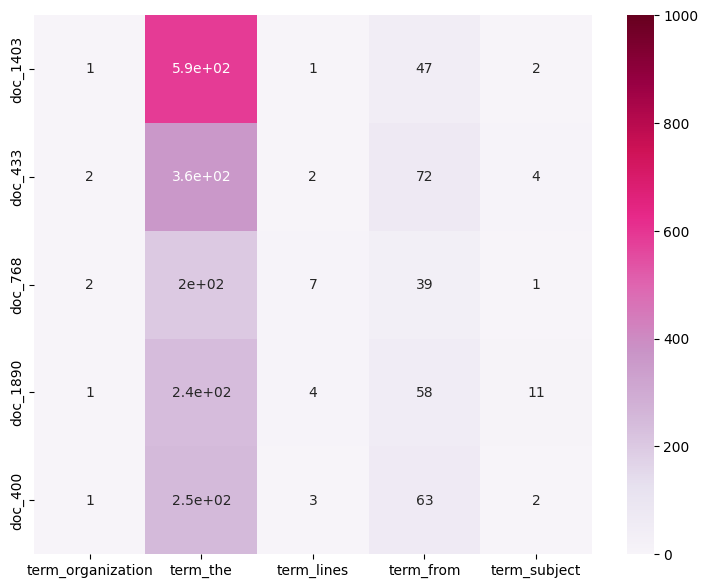

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Answer here

n = 5
sorted_row_indices = np.argsort(np.array(X_counts.getnnz(axis=1)).ravel())
sorted_col_indices = np.argsort(np.array(X_counts.getnnz(axis=0)).ravel())

col_list = list(sorted_col_indices[-n:])
row_list = list(sorted_row_indices[-n:])

my_plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[col_list]]
my_plot_y = ["doc_"+ str(i) for i in list(X.index[row_list])]
my_plot_z = X_counts.toarray()[row_list][:,col_list]

df_todraw = pd.DataFrame(my_plot_z, columns = my_plot_x, index = my_plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1000, annot=True)

Exercise 12

(2257, 35788)


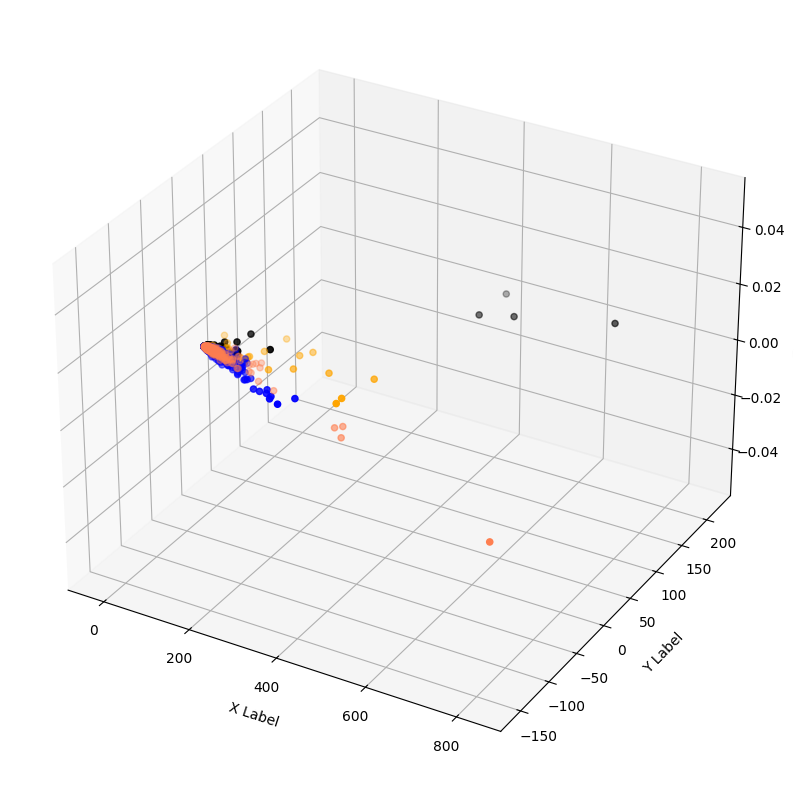

In [6]:
from sklearn.decomposition import PCA
col = ['coral', 'blue', 'black', 'orange']

# Answer here
from mpl_toolkits.mplot3d import Axes3D

print(X_counts.shape)
X_pca3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
assert X_pca3.shape == (2257, 3)


fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_pca3[X['category_name'] == category].T[0]
    ys = X_pca3[X['category_name'] == category].T[1]
    zs = X_pca3[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()
# 'comp.graphics' has higher 'z' value

Exercise 13

In [7]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

Exercise 14


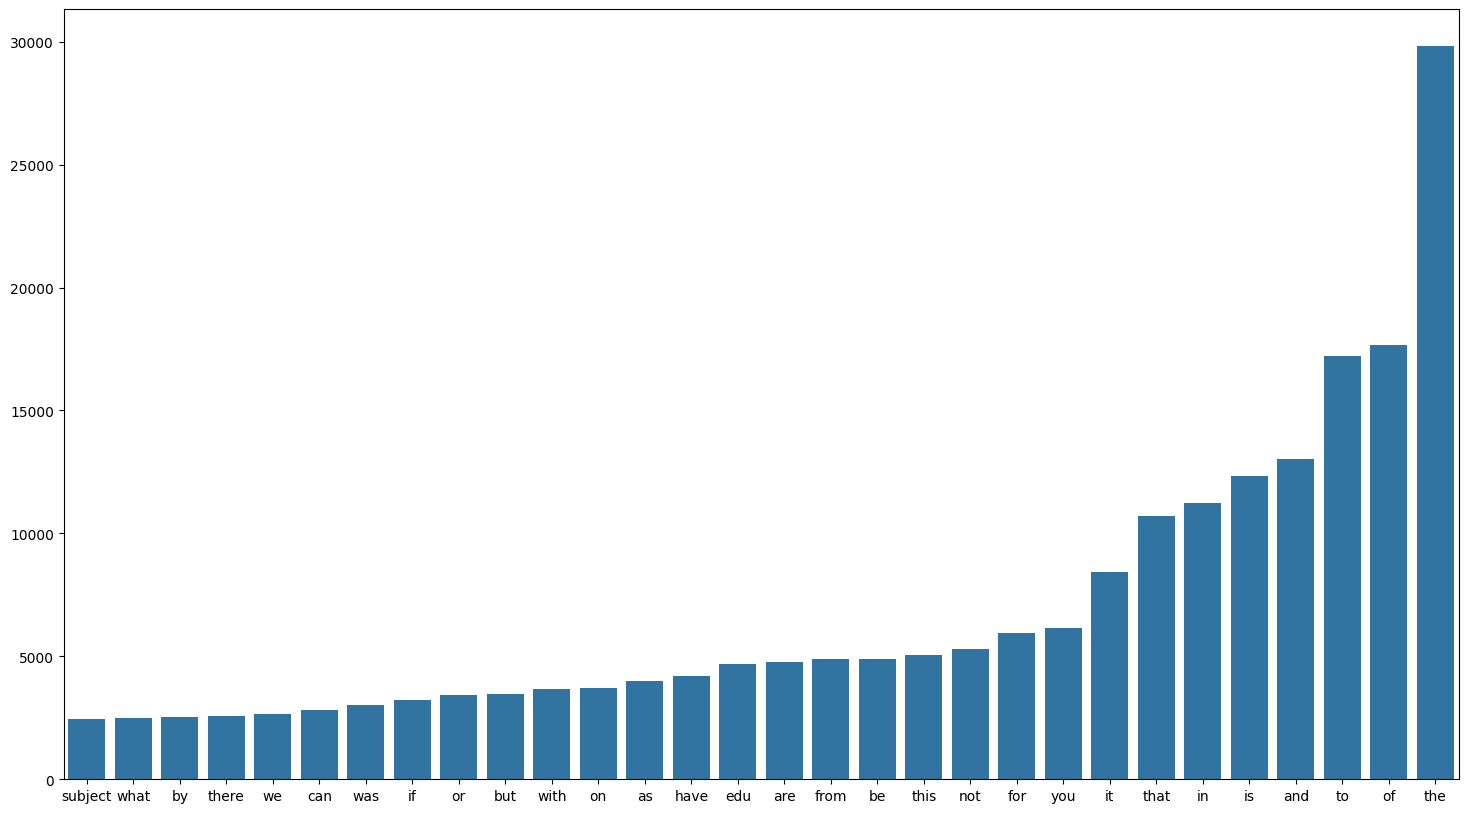

In [8]:
# Answer here
n = 30
terms_idx = np.argsort(term_frequencies)[-n:]
plt.subplots(figsize=(18, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[list(terms_idx)], 
            y=term_frequencies[list(terms_idx)])

Exercise 15

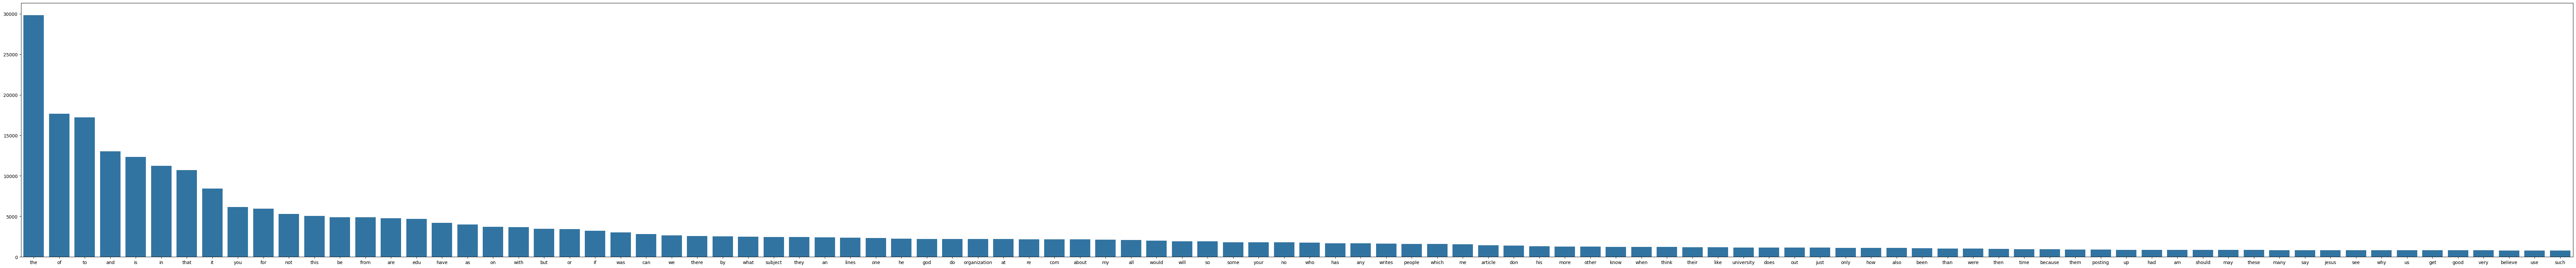

In [9]:
# Answer here
n = 100
terms_idx = np.argsort(term_frequencies)[-n:]
temp = list(terms_idx)
temp.reverse()
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[temp], 
            y=term_frequencies[temp])

Exercise 16

In [10]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X.head(10)

# it works

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


## part 2


prepare data and drop NaN values

In [11]:
import os 
print(os.getcwd())
df1 = pd.read_csv('new dataset/amazon_cells_labelled.txt', sep="	",header=None,names=['text','label','category_name'])
df2 = pd.read_csv('new dataset/imdb_labelled.txt', sep="	",header=None,names=['text','label','category_name'])
df3 = pd.read_csv('new dataset/yelp_labelled.txt', sep="	",header=None,names=['text','label','category_name'])
df1['category_name'] = pd.Series(['amazon_cells']*len(df1))
df2['category_name'] = pd.Series(['imdb']*len(df2))
df3['category_name'] = pd.Series(['yelp']*len(df3))

part2_X = pd.concat([df1,df2,df3],ignore_index=True).dropna()
part2_X

/mnt/HDD/data_mining/lab1/DM2023-Lab1-Master/Homework


,text,label,category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells
1,"Good case, Excellent value.",1,amazon_cells
2,Great for the jawbone.,1,amazon_cells
3,Tied to charger for conversations lasting more...,0,amazon_cells
4,The mic is great.,1,amazon_cells
...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp
2744,Appetite instantly gone.,0,yelp
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp


sampling

In [12]:
print(part2_X.shape)
part2_X_sample = part2_X.sample(n=1000,random_state=42) #random state
display(part2_X_sample)

(2748, 3)


,text,label,category_name
2516,"It's close to my house, it's low-key, non-fanc...",1,yelp
2642,If you stay in Vegas you must get breakfast he...,1,yelp
1359,"Let's start with all the problemsthe acting, ...",0,imdb
1702,It's too bad that everyone else involved didn'...,0,imdb
2660,"i felt insulted and disrespected, how could yo...",0,yelp
...,...,...,...
158,And I just love the colors!,1,amazon_cells
1862,Good prices.,1,yelp
861,It was a waste of my money.,0,amazon_cells
1307,About ten minutes into this film I started hav...,0,imdb


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

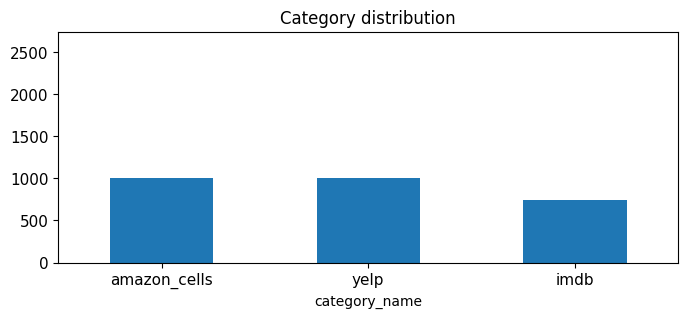

In [13]:
part2_categories = ['amazon_cells','imdb','yelp']
part2_X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, len(part2_X)],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [14]:
import nltk
nltk.download('punkt')
temp_X = pd.DataFrame()
temp_X['unigrams'] = part2_X['text'].apply(lambda x: dmh.tokenize_text(x))
print(temp_X[0:4]["unigrams"])
del temp_X

[nltk_data] Downloading package punkt to /home/hui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object


In [15]:
part2_count_vect = CountVectorizer(stop_words='english')
part2_X_counts = part2_count_vect.fit_transform(part2_X.text) #learn the vocabulary and return document-term matrix
print(part2_X_counts.shape)
print(part2_X_counts[0])

(2748, 4896)
  (0, 4754)	1
  (0, 3217)	1
  (0, 4566)	1
  (0, 959)	1


In [16]:
print(part2_count_vect.get_feature_names_out()[0:10])
print(part2_X_counts.shape)

['00' '10' '100' '11' '12' '13' '15' '15g' '15pm' '17']
(2748, 4896)


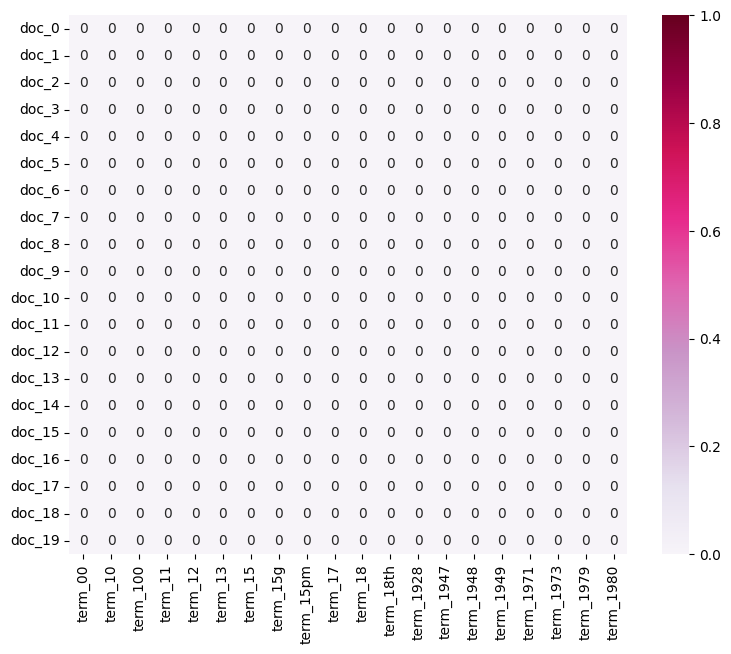

In [17]:
plot_x = ["term_"+str(i) for i in part2_count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(part2_X.index)[0:20]]
plot_z = part2_X_counts[0:20, 0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
del plot_x,plot_y,plot_z,df_todraw,ax

,term_film,term_movie,term_phone,term_great,term_good
doc_1135,4,6,0,2,0
doc_1149,1,4,0,0,1
doc_1646,7,10,0,4,3
doc_1019,12,9,0,3,5
doc_1136,14,16,0,5,4


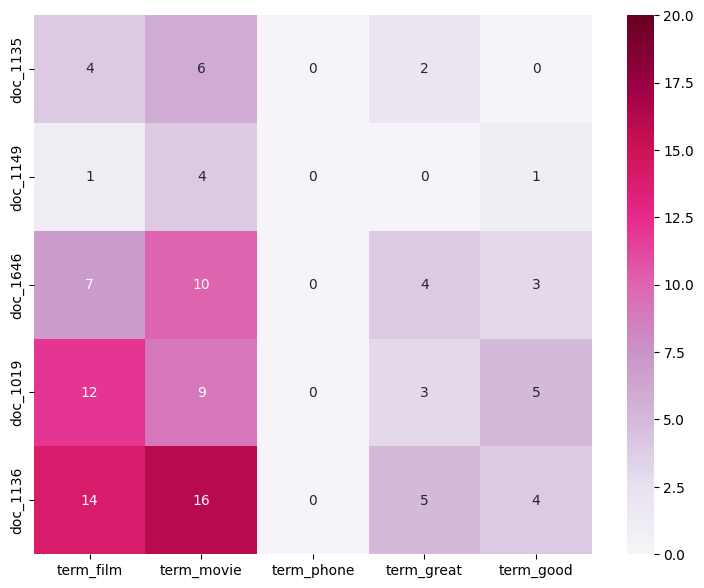

In [18]:
n = 5
sorted_row_indices = np.argsort(np.array(part2_X_counts.getnnz(axis=1)).ravel())
sorted_col_indices = np.argsort(np.array(part2_X_counts.getnnz(axis=0)).ravel())

col_list = list(sorted_col_indices[-n:])
row_list = list(sorted_row_indices[-n:])

my_plot_x = ["term_"+str(i) for i in part2_count_vect.get_feature_names_out()[col_list]]
my_plot_y = ["doc_"+ str(i) for i in list(part2_X.index[row_list])]
my_plot_z = part2_X_counts.toarray()[row_list][:,col_list]

df_todraw = pd.DataFrame(my_plot_z, columns = my_plot_x, index = my_plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=20, annot=True)

In [19]:
print(part2_X_counts.shape)
part2_X_reduced = PCA(n_components = 2).fit_transform(part2_X_counts.toarray())
print(part2_X_reduced.shape)
print(part2_X.shape)

(2748, 4896)
(2748, 2)
(2748, 3)


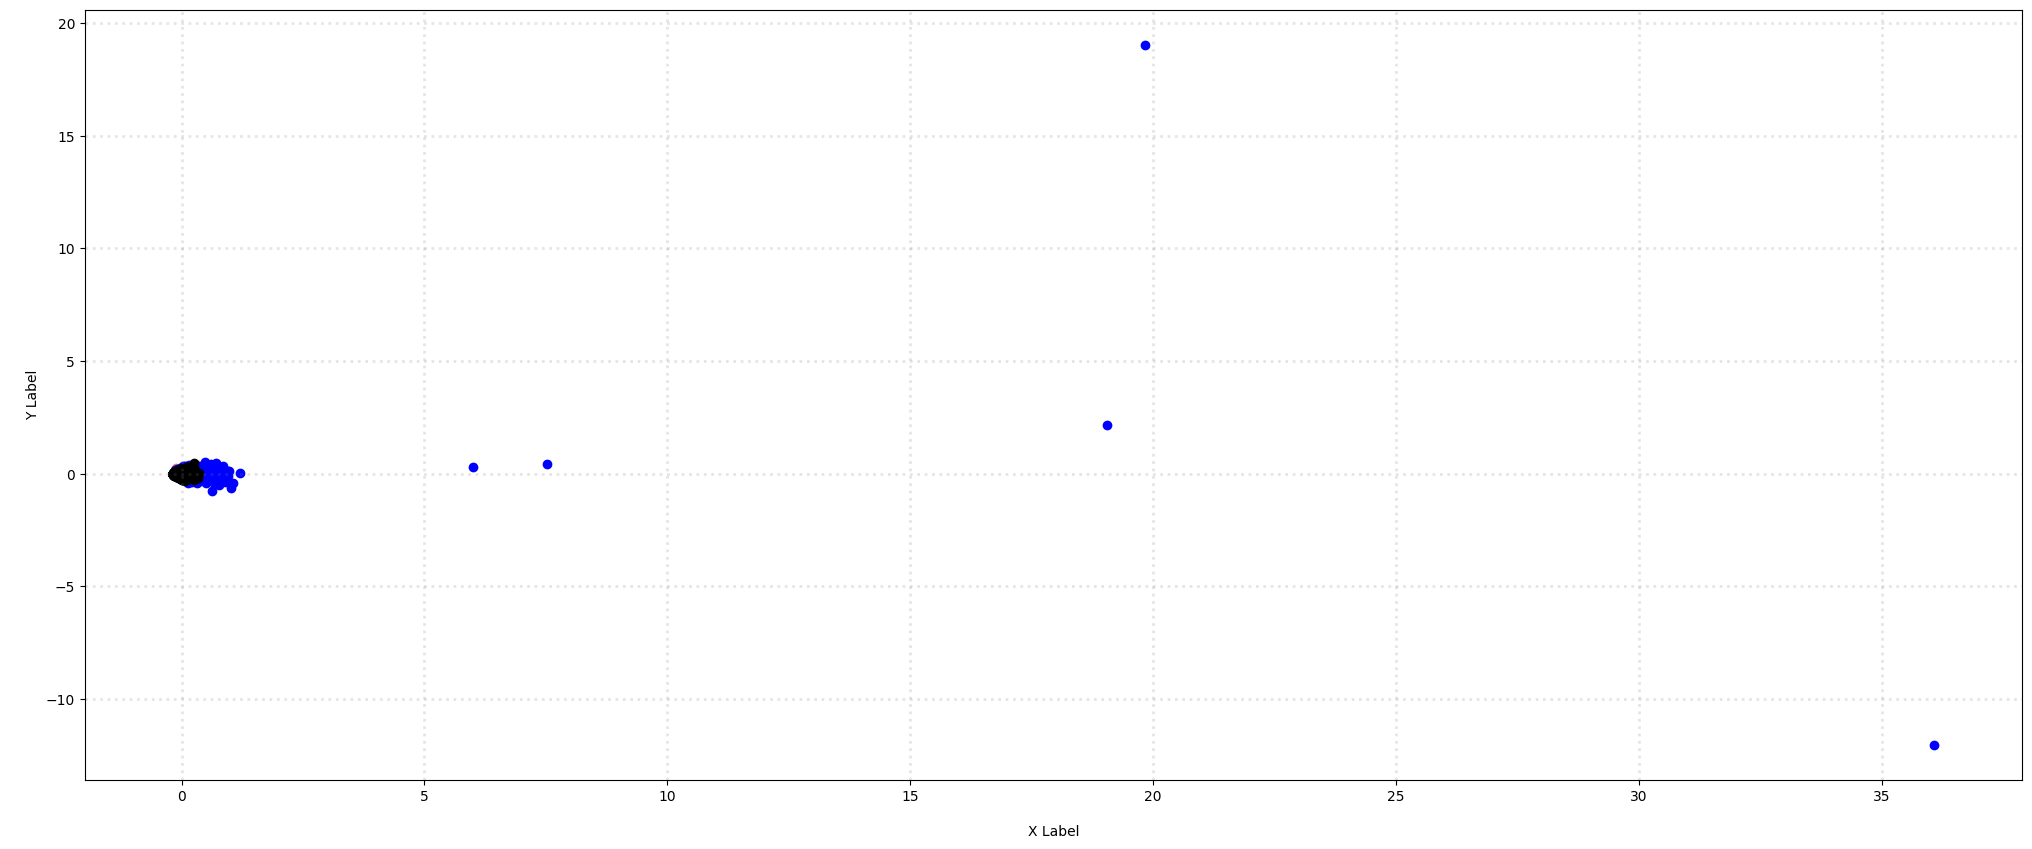

In [20]:
col = ['coral', 'blue', 'black']
categories = ['amazon_cells','imdb','yelp']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = part2_X_reduced[part2_X['category_name'] == category].T[0]
    ys = part2_X_reduced[part2_X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

(2748, 4896)


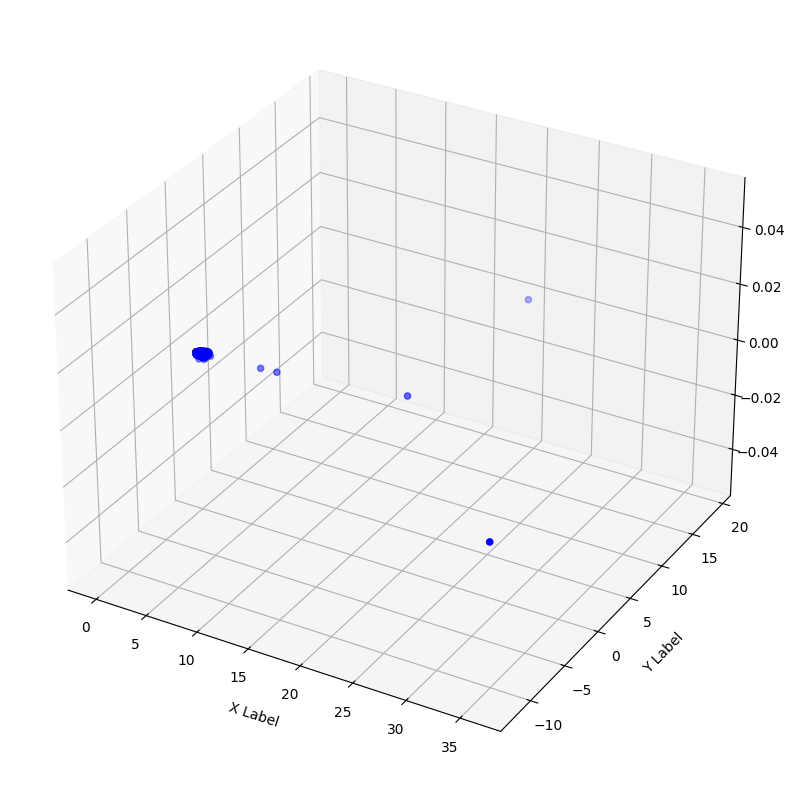

In [21]:

print(part2_X_counts.shape)
part2_X_pca3 = PCA(n_components = 3).fit_transform(part2_X_counts.toarray())


fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = part2_X_pca3[part2_X['category_name'] == category].T[0]
    ys = part2_X_pca3[part2_X['category_name'] == category].T[1]
    zs = part2_X_pca3[part2_X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()


In [22]:
part2_term_frequencies = np.asarray(part2_X_counts.sum(axis=0))[0]
print(part2_term_frequencies)

[ 1 38  3 ...  1  2  1]


/tmp/ipykernel_82103/3083468888.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(part2_count_vect.get_feature_names_out()[:300], rotation = 90);


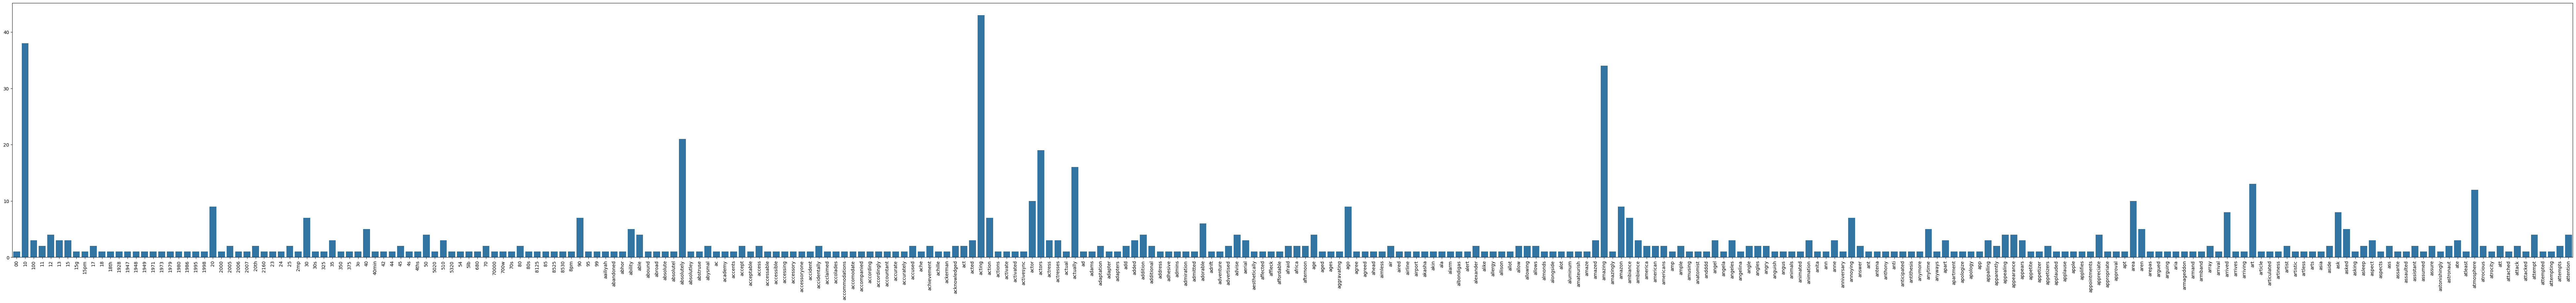

In [23]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=part2_count_vect.get_feature_names_out()[:300], 
            y=part2_term_frequencies[:300])
g.set_xticklabels(part2_count_vect.get_feature_names_out()[:300], rotation = 90);

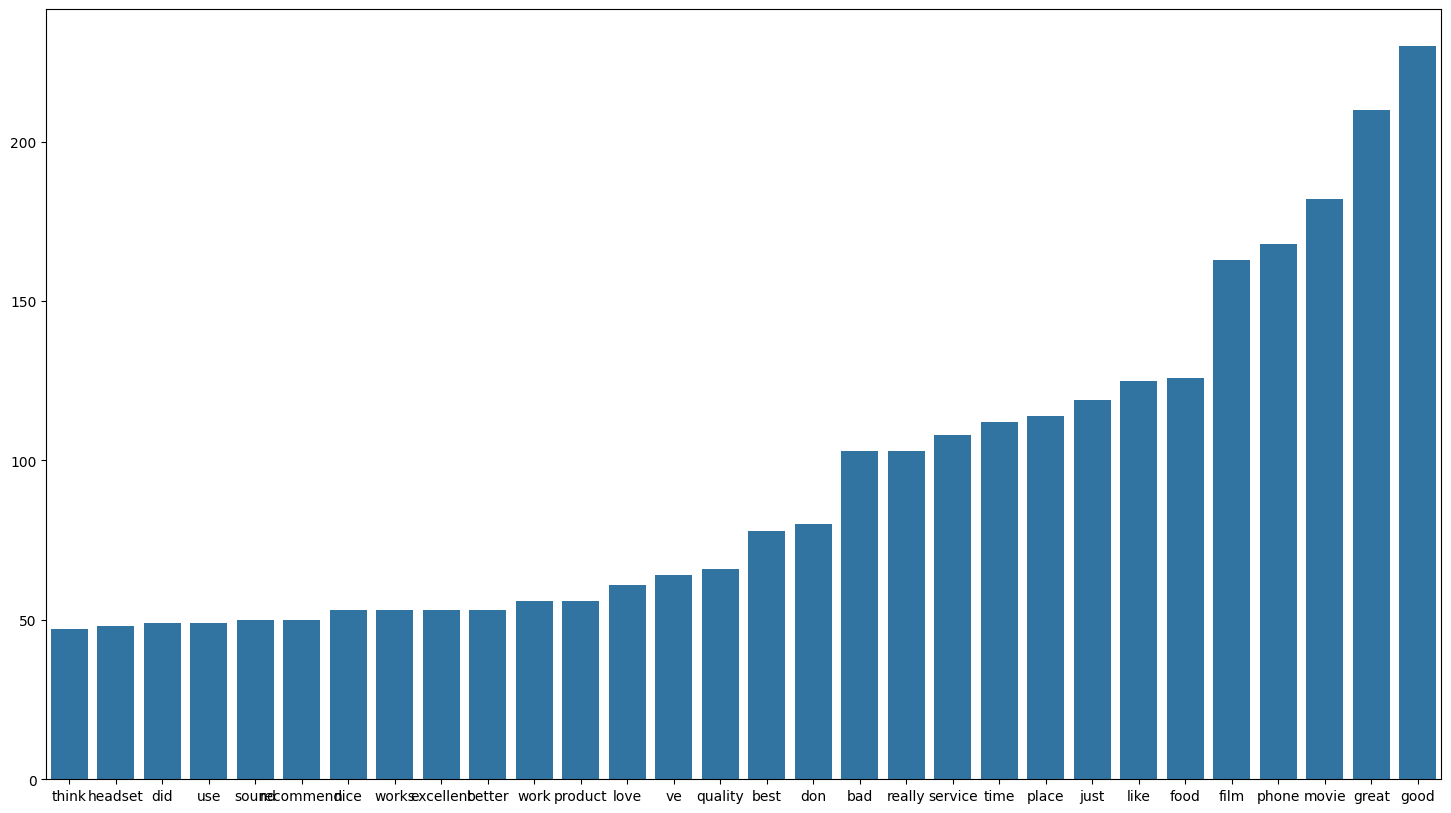

In [24]:
n = 30
terms_idx = np.argsort(part2_term_frequencies)[-n:]
plt.subplots(figsize=(18, 10))
g = sns.barplot(x=part2_count_vect.get_feature_names_out()[list(terms_idx)], 
            y=part2_term_frequencies[list(terms_idx)])

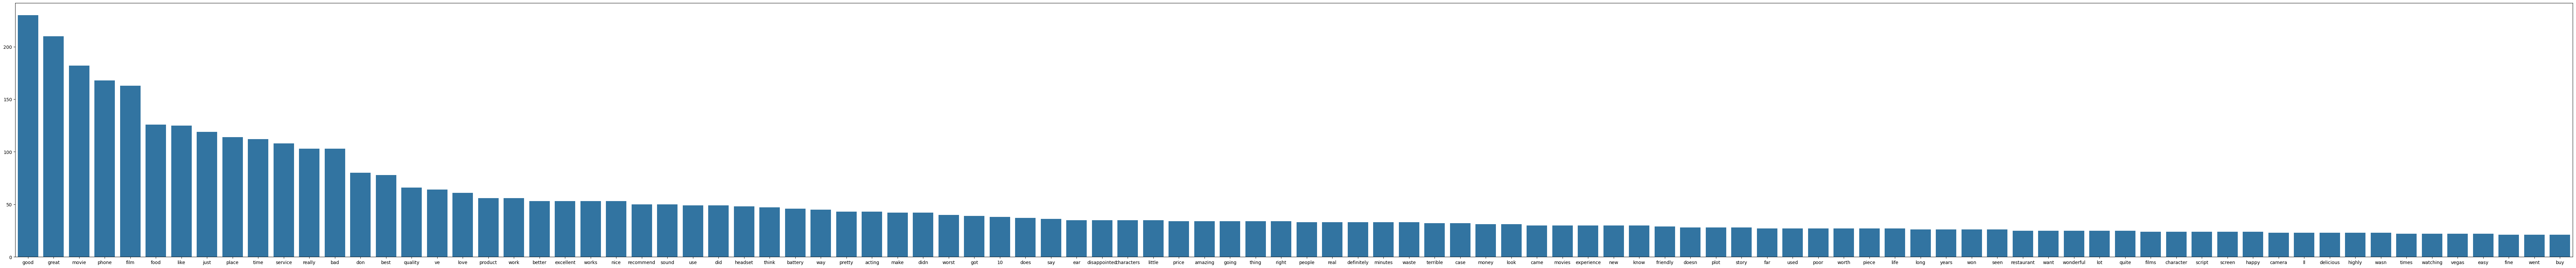

In [25]:
n = 100
terms_idx = np.argsort(part2_term_frequencies)[-n:]
temp = list(terms_idx)
temp.reverse()
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=part2_count_vect.get_feature_names_out()[temp], 
            y=part2_term_frequencies[temp])

In [26]:
mlb.fit(part2_X.category_name)
part2_X['bin_category_name'] = mlb.transform(part2_X['category_name']).tolist()
part2_X.head(10)


,text,label,category_name,bin_category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells,"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon_cells,"[1, 0, 0]"
2,Great for the jawbone.,1,amazon_cells,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon_cells,"[1, 0, 0]"
4,The mic is great.,1,amazon_cells,"[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon_cells,"[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon_cells,"[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon_cells,"[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon_cells,"[1, 0, 0]"
9,What a waste of money and time!.,0,amazon_cells,"[1, 0, 0]"


Data exploration

In [27]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = part2_X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = part2_X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = part2_X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = part2_count_vect.transform(document_to_transform_1)
document_vector_count_2 = part2_count_vect.transform(document_to_transform_2)
document_vector_count_3 = part2_count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_82103/1486624250.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/tmp/ipykernel_82103/1486624250.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/tmp/ipykernel_82103/1486624250.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 2 and 3: %

## part 3


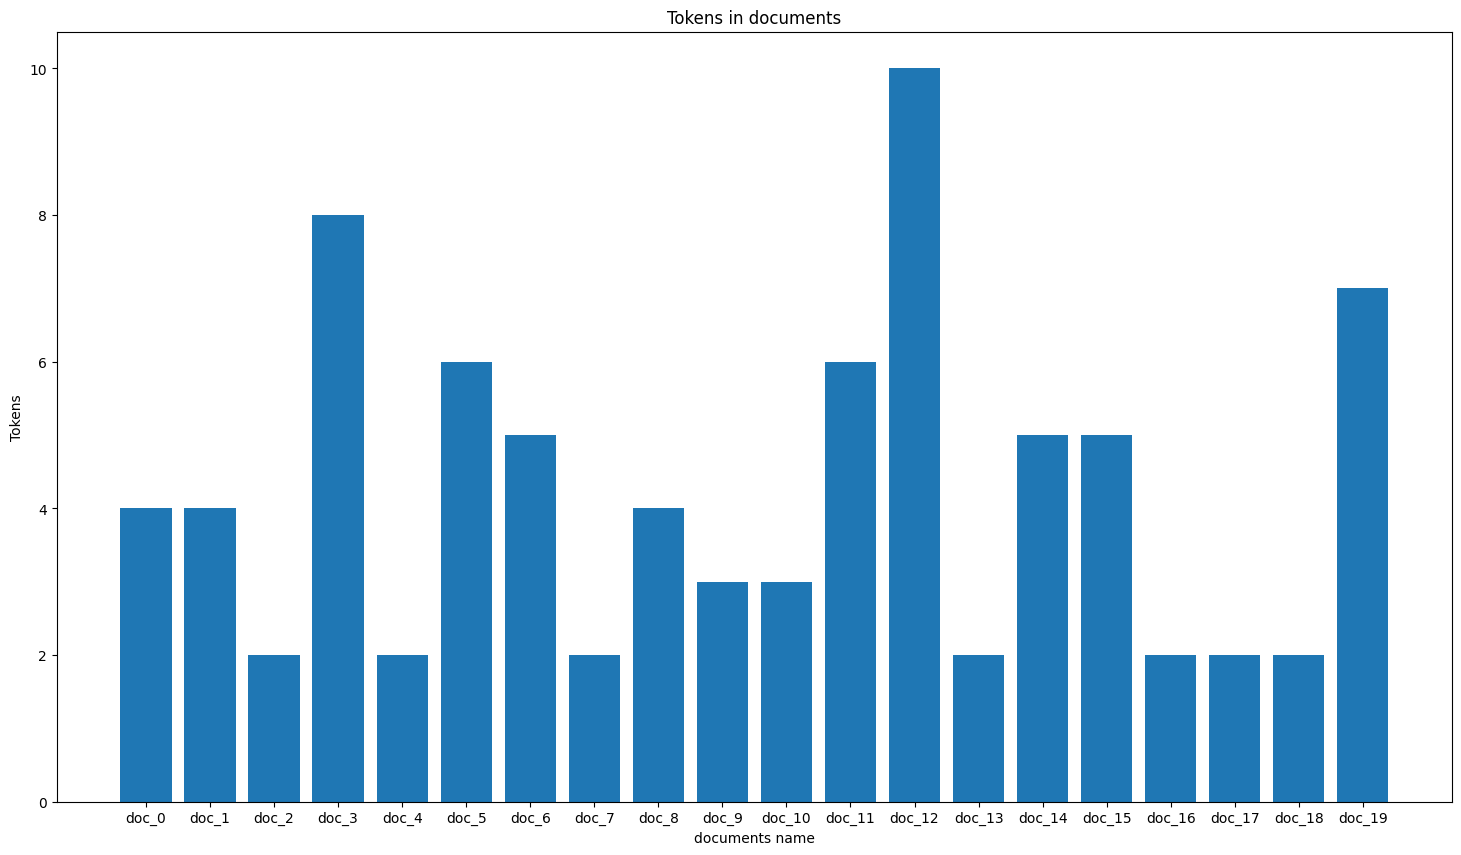

In [28]:
part3_word_count = np.asarray(part2_X_counts.sum(axis=1))[:,0]
doc_name = ["doc_"+ str(i) for i in list(part2_X.index)]

plt.subplots(figsize=(18, 10))
plt.bar(doc_name[:20], part3_word_count[:20])
plt.xlabel("documents name")
plt.ylabel("Tokens")
plt.title("Tokens in documents")
plt.show()


In [29]:
## tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_X = vectorizer.fit_transform(part2_X['text'])
vectorizer.get_feature_names_out()
print(tfidf_X.shape)

(2748, 5155)


In [30]:
from sklearn.naive_bayes import  MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

mnb = MultinomialNB()

score1 = cross_val_score(mnb, part2_X_counts.toarray(), part2_X['label'], scoring='accuracy', cv=5).mean()
score2 = cross_val_score(mnb, tfidf_X.toarray(), part2_X['label'], scoring='accuracy', cv=5).mean()

print('word frequency features score: {}\nTF-IDF features score: {}'.format(score1,score2))

word frequency features score: 0.7754747474747474
TF-IDF features score: 0.8144169564497433


TF-IDF is able to prioritize important and relevant words in a file based on their frequency of occurrence in the file and their uniqueness in the file collection.
we can see TF-IDF has better performance then word frequence


## part4
when we using tokenlizer we should consider there are some words are presumed to be uninformative in representing the content of a text.
the default in **CountVectorizer** in **sklearn** is None, we might replace to english

In [31]:
# count_vect = CountVectorizer()
# to 
new_count_vect = CountVectorizer(stop_words ='english')
# or we could call our tokenlizer
new_count_vect = CountVectorizer(tokenizer=dmh.tokenize_text)

the "for loop" in part5.5 is realy wasting time, we can use 'numpy.sum' instead

In [32]:
'''
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
'''
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

Also there are many word only apears only one time in the document, we could see in below code.

In [33]:
np.count_nonzero(term_frequencies == 1)

14606

remove

In [34]:
remove_idx = part2_term_frequencies == 1
new_X_counts = np.delete(part2_X_counts.toarray(),remove_idx,1)
new_feature_names =np.delete(part2_count_vect.get_feature_names_out(),remove_idx,0)

print(part2_X_counts.shape,new_X_counts.shape)

(2748, 4896) (2748, 2003)


select top 300 frequence word to do PCA

(2748, 4896)


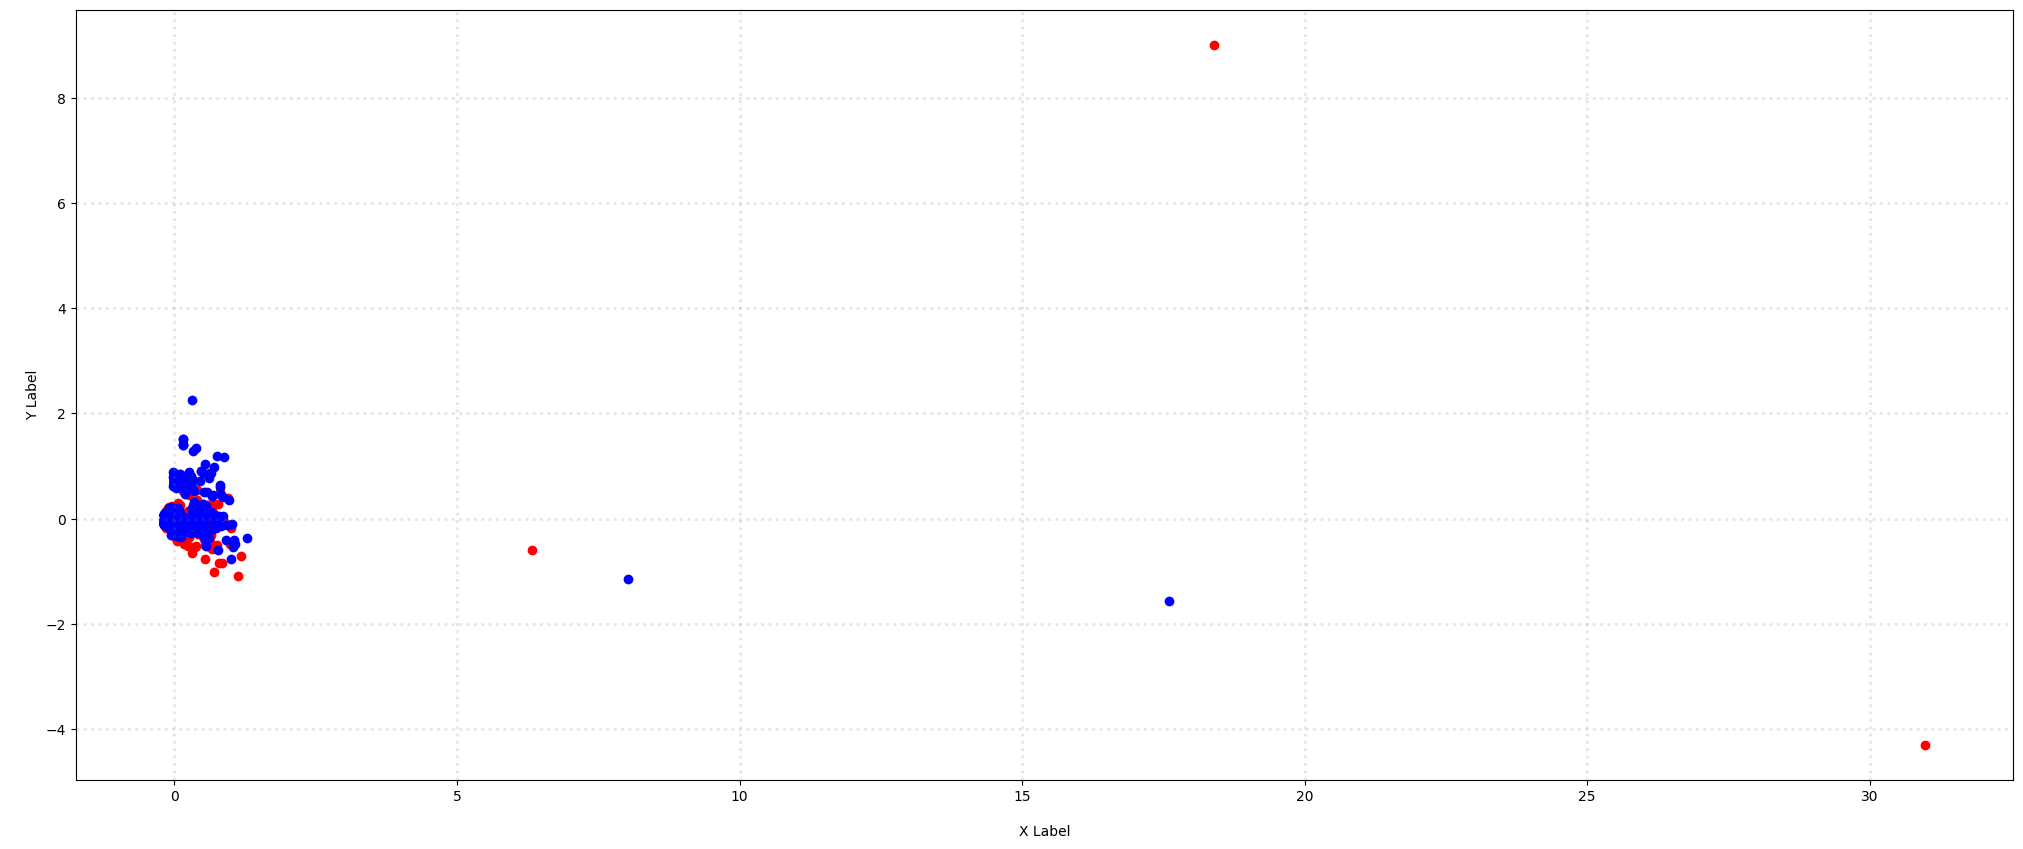

In [44]:
print(part2_X_counts.shape)
n  = 300
sorted_col_indices = np.argsort(np.array(part2_X_counts.getnnz(axis=0)).ravel())
col_list = list(sorted_col_indices[-n:])
part2_X_reduced = PCA(n_components = 2).fit_transform(part2_X_counts.toarray()[:,col_list])

col = ['red', 'blue']
labels = [0,1]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, label in zip(col, labels):
    xs = part2_X_reduced[part2_X['label'] == label].T[0]
    ys = part2_X_reduced[part2_X['label'] == label].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()